<a href="https://colab.research.google.com/github/JeelCueva/omega-data-website/blob/main/karen_fuentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATOS CARGADOS EXITOSAMENTE
Total de encuestados: 29
Total de preguntas: 21

ESTADÍSTICAS DESCRIPTIVAS GENERALES

Promedio de conocimiento: 525.45%
Desviación estándar: 76.64%
Puntaje mínimo: 209.52%
Puntaje máximo: 623.81%
Mediana: 533.33%

DISTRIBUCIÓN POR NIVEL DE CONOCIMIENTO:
  Excelente: 29 (100.0%)

ANÁLISIS POR PREGUNTA

PREGUNTAS MÁS DIFÍCILES (menor % de aciertos):
  1. P16 - 6.9% de aciertos
      Tema: Antibióticos - Alergia penicilina
  2. P3 - 17.2% de aciertos
      Tema: AINES - Edad
  3. P13 - 20.7% de aciertos
      Tema: Antibióticos - Duración
  4. P20 - 20.7% de aciertos
      Tema: Antibióticos - Concentración amox+clavulánico
  5. P18 - 24.1% de aciertos
      Tema: Antibióticos - Dosis máxima amoxicilina

PREGUNTAS MÁS FÁCILES (mayor % de aciertos):
  1. P1 - 86.2% de aciertos
      Tema: AINES - Indicación
  2. P12 - 75.9% de aciertos
      Tema: Antibióticos - Definición
  3. P14 - 72.4% de aciertos
      Tema: Antibióticos - Administración amoxicilina
  4. P1

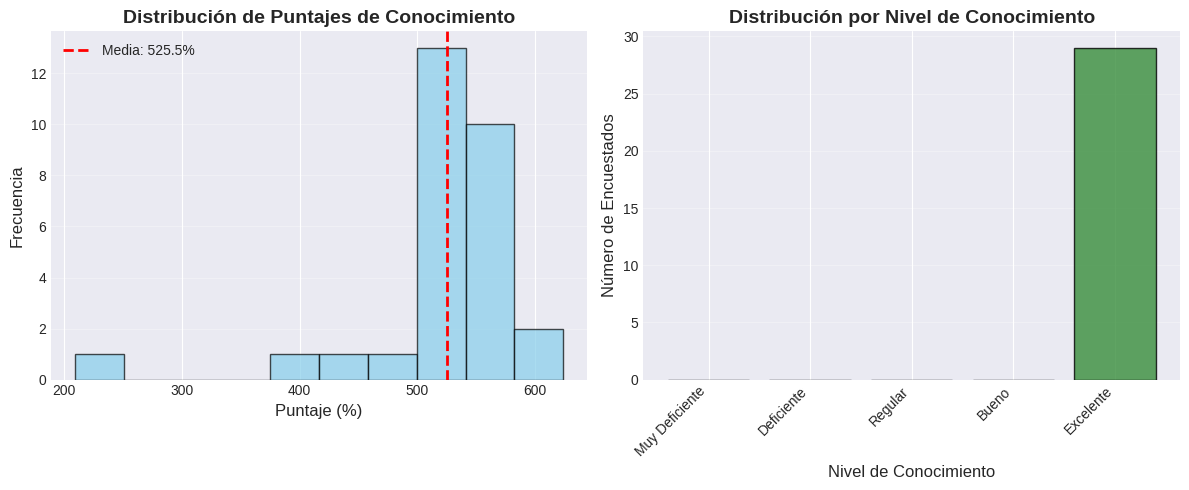

✓ Guardado: aciertos_por_pregunta.png


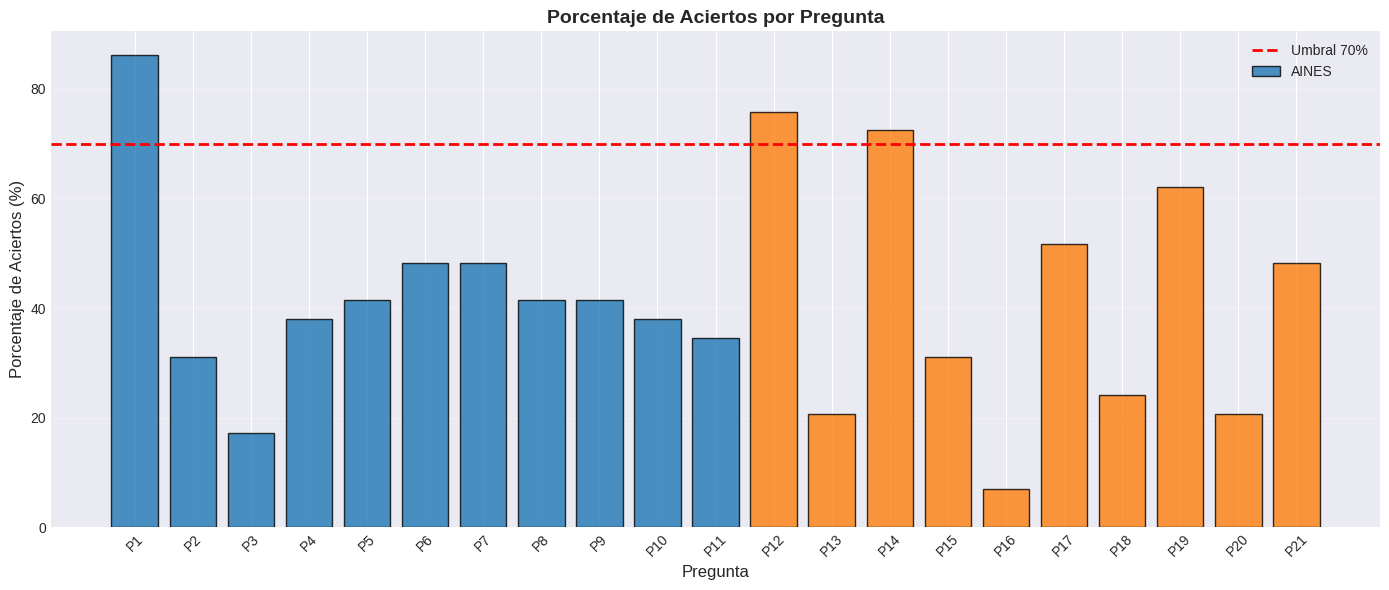

/tmp/ipython-input-2028611449.py:206: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_comparacion, labels=['AINES', 'Antibióticos'], patch_artist=True,


✓ Guardado: comparacion_temas.png


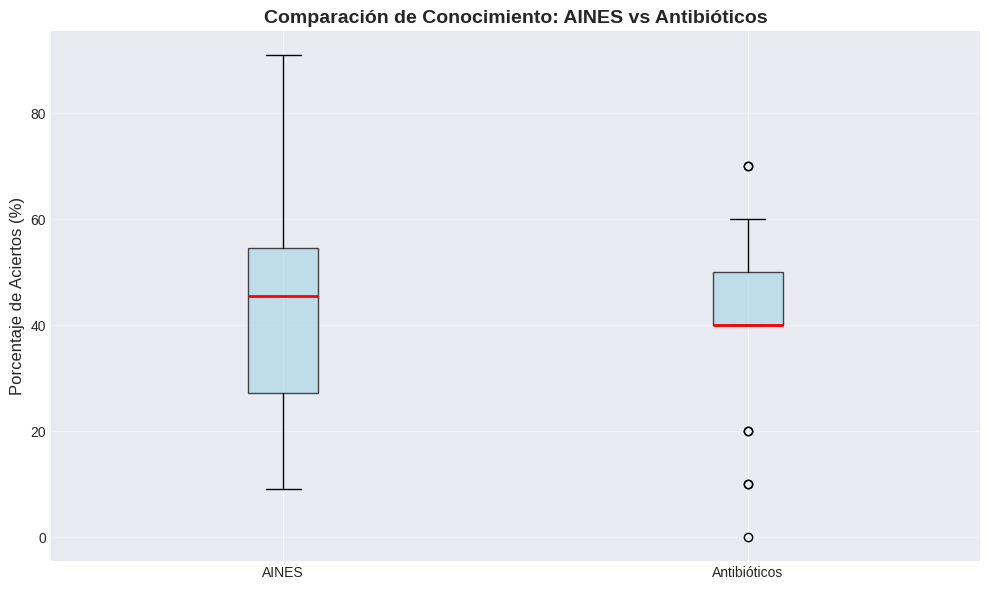


EXPORTANDO RESULTADOS...
✓ Guardado: resultados_analisis.xlsx

INTERPRETACIÓN DE RESULTADOS

Nivel general de conocimiento: EXCELENTE - Los internos demuestran un conocimiento sobresaliente

⚠ ÁREA DE MEJORA PRIORITARIA: Antibióticos

ANÁLISIS COMPLETADO

Archivos generados:
  1. distribucion_puntajes.png
  2. aciertos_por_pregunta.png
  3. comparacion_temas.png
  4. resultados_analisis.xlsx

¡Éxito en tu tesis! 🎓


In [1]:
"""
SCRIPT DE ANÁLISIS PARA CUESTIONARIO DE ODONTOPEDIATRÍA
Nivel de conocimiento en internos de odontología sobre prescripción de medicamentos
Huancayo 2025

Autor: Script generado para análisis de tesis
Fecha: 2025
"""

# ============================================
# 1. INSTALACIÓN Y CARGA DE LIBRERÍAS
# ============================================
# Si estás en Google Colab, ejecuta esto primero:
# !pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================
# 2. CARGAR DATOS
# ============================================
# Si estás en Google Colab, primero sube el archivo:
# from google.colab import files
# uploaded = files.upload()

# Cargar las hojas del Excel
archivo = 'cuestionario_odontopediatria.xlsx'  # Cambia el nombre si es necesario

df_respuestas = pd.read_excel(archivo, sheet_name='Respuestas')
df_correctas = pd.read_excel(archivo, sheet_name='Respuestas_Correctas')
df_calificacion = pd.read_excel(archivo, sheet_name='Calificacion')

print("=" * 60)
print("DATOS CARGADOS EXITOSAMENTE")
print("=" * 60)
print(f"Total de encuestados: {len(df_respuestas)}")
print(f"Total de preguntas: {len(df_correctas)}")
print()

# ============================================
# 3. ANÁLISIS DESCRIPTIVO GENERAL
# ============================================
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS GENERALES")
print("=" * 60)

# Calcular estadísticas de puntaje
puntajes = df_calificacion['Puntaje_Porcentaje']

print(f"\nPromedio de conocimiento: {puntajes.mean():.2f}%")
print(f"Desviación estándar: {puntajes.std():.2f}%")
print(f"Puntaje mínimo: {puntajes.min():.2f}%")
print(f"Puntaje máximo: {puntajes.max():.2f}%")
print(f"Mediana: {puntajes.median():.2f}%")

# Distribución por nivel de conocimiento
print("\nDISTRIBUCIÓN POR NIVEL DE CONOCIMIENTO:")
distribucion_niveles = df_calificacion['Nivel_Conocimiento'].value_counts()
for nivel, cantidad in distribucion_niveles.items():
    porcentaje = (cantidad / len(df_calificacion)) * 100
    print(f"  {nivel}: {cantidad} ({porcentaje:.1f}%)")

# ============================================
# 4. ANÁLISIS POR PREGUNTA
# ============================================
print("\n" + "=" * 60)
print("ANÁLISIS POR PREGUNTA")
print("=" * 60)

# Calcular porcentaje de aciertos por pregunta
columnas_preguntas = [col for col in df_respuestas.columns if col.startswith('P')]
respuestas_dict = dict(zip(df_correctas['Pregunta'], df_correctas['Respuesta_Correcta']))

aciertos_por_pregunta = {}
for pregunta in columnas_preguntas:
    respuesta_correcta = respuestas_dict[pregunta]
    aciertos = (df_respuestas[pregunta] == respuesta_correcta).sum()
    porcentaje = (aciertos / len(df_respuestas)) * 100
    aciertos_por_pregunta[pregunta] = porcentaje

# Ordenar por dificultad (menos aciertos = más difícil)
aciertos_ordenados = sorted(aciertos_por_pregunta.items(), key=lambda x: x[1])

print("\nPREGUNTAS MÁS DIFÍCILES (menor % de aciertos):")
for i, (pregunta, porcentaje) in enumerate(aciertos_ordenados[:5], 1):
    num_preg = int(pregunta[1:])
    tema = df_correctas[df_correctas['Pregunta'] == pregunta]['Tema'].values[0]
    print(f"  {i}. {pregunta} - {porcentaje:.1f}% de aciertos")
    print(f"      Tema: {tema}")

print("\nPREGUNTAS MÁS FÁCILES (mayor % de aciertos):")
for i, (pregunta, porcentaje) in enumerate(reversed(aciertos_ordenados[-5:]), 1):
    num_preg = int(pregunta[1:])
    tema = df_correctas[df_correctas['Pregunta'] == pregunta]['Tema'].values[0]
    print(f"  {i}. {pregunta} - {porcentaje:.1f}% de aciertos")
    print(f"      Tema: {tema}")

# ============================================
# 5. ANÁLISIS POR TEMA
# ============================================
print("\n" + "=" * 60)
print("ANÁLISIS POR TEMA (AINES vs ANTIBIÓTICOS)")
print("=" * 60)

# Clasificar preguntas por tema principal
preguntas_aines = [f'P{i}' for i in range(1, 12)]  # P1-P11
preguntas_antibioticos = [f'P{i}' for i in range(12, 22)]  # P12-P21

# Calcular promedio por tema para cada encuestado
df_respuestas['Aciertos_AINES'] = 0
df_respuestas['Aciertos_Antibioticos'] = 0

for idx, row in df_respuestas.iterrows():
    # AINES
    aciertos_aines = sum([1 for p in preguntas_aines
                          if row[p] == respuestas_dict[p]])
    df_respuestas.at[idx, 'Aciertos_AINES'] = aciertos_aines

    # Antibióticos
    aciertos_antibioticos = sum([1 for p in preguntas_antibioticos
                                 if row[p] == respuestas_dict[p]])
    df_respuestas.at[idx, 'Aciertos_Antibioticos'] = aciertos_antibioticos

# Calcular porcentajes
df_respuestas['Porcentaje_AINES'] = (df_respuestas['Aciertos_AINES'] / 11) * 100
df_respuestas['Porcentaje_Antibioticos'] = (df_respuestas['Aciertos_Antibioticos'] / 10) * 100

print(f"\nPromedio de conocimiento en AINES: {df_respuestas['Porcentaje_AINES'].mean():.2f}%")
print(f"Promedio de conocimiento en ANTIBIÓTICOS: {df_respuestas['Porcentaje_Antibioticos'].mean():.2f}%")

# Test estadístico para comparar temas
t_stat, p_value = stats.ttest_rel(df_respuestas['Porcentaje_AINES'],
                                   df_respuestas['Porcentaje_Antibioticos'])
print(f"\nTest t pareado: t={t_stat:.3f}, p={p_value:.4f}")
if p_value < 0.05:
    print("✓ Existe diferencia significativa entre el conocimiento de AINES y Antibióticos")
else:
    print("✗ No hay diferencia significativa entre el conocimiento de AINES y Antibióticos")

# ============================================
# 6. VISUALIZACIONES
# ============================================
print("\n" + "=" * 60)
print("GENERANDO VISUALIZACIONES...")
print("=" * 60)

# Figura 1: Distribución de puntajes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(puntajes, bins=10, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(puntajes.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {puntajes.mean():.1f}%')
plt.xlabel('Puntaje (%)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Puntajes de Conocimiento', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
niveles_orden = ['Muy Deficiente', 'Deficiente', 'Regular', 'Bueno', 'Excelente']
dist_niveles = df_calificacion['Nivel_Conocimiento'].value_counts()
colores = ['#d32f2f', '#ff9800', '#fdd835', '#7cb342', '#388e3c']
dist_niveles_ordenado = [dist_niveles.get(nivel, 0) for nivel in niveles_orden]
plt.bar(niveles_orden, dist_niveles_ordenado, color=colores, edgecolor='black', alpha=0.8)
plt.xlabel('Nivel de Conocimiento', fontsize=12)
plt.ylabel('Número de Encuestados', fontsize=12)
plt.title('Distribución por Nivel de Conocimiento', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('distribucion_puntajes.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: distribucion_puntajes.png")
plt.show()

# Figura 2: Aciertos por pregunta
plt.figure(figsize=(14, 6))
preguntas = list(aciertos_por_pregunta.keys())
porcentajes_aciertos = list(aciertos_por_pregunta.values())

colores_barras = ['#1f77b4' if i < 11 else '#ff7f0e' for i in range(len(preguntas))]
plt.bar(preguntas, porcentajes_aciertos, color=colores_barras, edgecolor='black', alpha=0.8)
plt.axhline(y=70, color='red', linestyle='--', linewidth=2, label='Umbral 70%')
plt.xlabel('Pregunta', fontsize=12)
plt.ylabel('Porcentaje de Aciertos (%)', fontsize=12)
plt.title('Porcentaje de Aciertos por Pregunta', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(['Umbral 70%', 'AINES', 'Antibióticos'], loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('aciertos_por_pregunta.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: aciertos_por_pregunta.png")
plt.show()

# Figura 3: Comparación AINES vs Antibióticos
plt.figure(figsize=(10, 6))
datos_comparacion = [df_respuestas['Porcentaje_AINES'],
                     df_respuestas['Porcentaje_Antibioticos']]
plt.boxplot(datos_comparacion, labels=['AINES', 'Antibióticos'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Porcentaje de Aciertos (%)', fontsize=12)
plt.title('Comparación de Conocimiento: AINES vs Antibióticos', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('comparacion_temas.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: comparacion_temas.png")
plt.show()

# ============================================
# 7. EXPORTAR RESULTADOS
# ============================================
print("\n" + "=" * 60)
print("EXPORTANDO RESULTADOS...")
print("=" * 60)

# Crear resumen de resultados
resumen = pd.DataFrame({
    'Estadística': ['Promedio', 'Desviación Estándar', 'Mínimo', 'Máximo', 'Mediana'],
    'Valor (%)': [puntajes.mean(), puntajes.std(), puntajes.min(),
                  puntajes.max(), puntajes.median()]
})

# Crear tabla de aciertos por pregunta
tabla_preguntas = pd.DataFrame({
    'Pregunta': list(aciertos_por_pregunta.keys()),
    'Porcentaje_Aciertos': list(aciertos_por_pregunta.values())
})
tabla_preguntas = tabla_preguntas.merge(df_correctas[['Pregunta', 'Tema']], on='Pregunta')

# Guardar en Excel
with pd.ExcelWriter('resultados_analisis.xlsx') as writer:
    resumen.to_excel(writer, sheet_name='Resumen_General', index=False)
    df_calificacion.to_excel(writer, sheet_name='Calificaciones', index=False)
    tabla_preguntas.to_excel(writer, sheet_name='Aciertos_por_Pregunta', index=False)
    df_respuestas[['ID_Encuestado', 'Porcentaje_AINES', 'Porcentaje_Antibioticos']].to_excel(
        writer, sheet_name='Analisis_por_Tema', index=False)

print("✓ Guardado: resultados_analisis.xlsx")

# ============================================
# 8. INTERPRETACIÓN Y CONCLUSIONES
# ============================================
print("\n" + "=" * 60)
print("INTERPRETACIÓN DE RESULTADOS")
print("=" * 60)

nivel_promedio = puntajes.mean()
if nivel_promedio >= 90:
    interpretacion = "EXCELENTE - Los internos demuestran un conocimiento sobresaliente"
elif nivel_promedio >= 80:
    interpretacion = "BUENO - Los internos tienen un conocimiento adecuado con áreas de mejora"
elif nivel_promedio >= 70:
    interpretacion = "REGULAR - Se requiere reforzar el conocimiento en áreas específicas"
elif nivel_promedio >= 60:
    interpretacion = "DEFICIENTE - Es necesaria capacitación urgente"
else:
    interpretacion = "MUY DEFICIENTE - Se requiere intervención educativa inmediata"

print(f"\nNivel general de conocimiento: {interpretacion}")

# Identificar áreas de mejora
if df_respuestas['Porcentaje_AINES'].mean() < df_respuestas['Porcentaje_Antibioticos'].mean():
    print("\n⚠ ÁREA DE MEJORA PRIORITARIA: AINES (Antiinflamatorios)")
elif df_respuestas['Porcentaje_AINES'].mean() > df_respuestas['Porcentaje_Antibioticos'].mean():
    print("\n⚠ ÁREA DE MEJORA PRIORITARIA: Antibióticos")
else:
    print("\n✓ Conocimiento equilibrado en ambas áreas")

print("\n" + "=" * 60)
print("ANÁLISIS COMPLETADO")
print("=" * 60)
print("\nArchivos generados:")
print("  1. distribucion_puntajes.png")
print("  2. aciertos_por_pregunta.png")
print("  3. comparacion_temas.png")
print("  4. resultados_analisis.xlsx")
print("\n¡Éxito en tu tesis! 🎓")

✓ Guardado: aciertos_por_pregunta_con_etiquetas.png


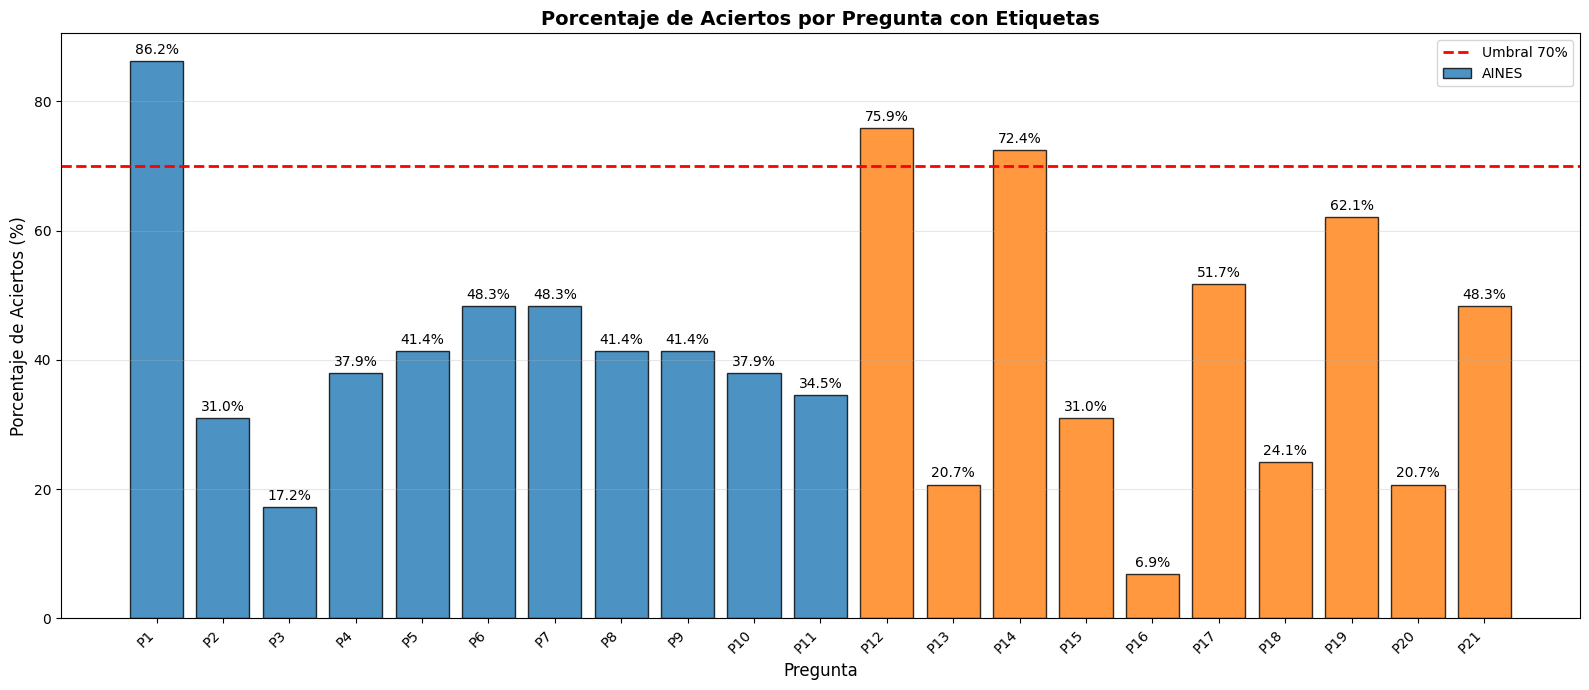

In [9]:
# Figura 4: Aciertos por pregunta con etiquetas de valores
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar las hojas del Excel (assuming 'archivo' is defined or use the filename directly)
archivo = 'cuestionario_odontopediatria.xlsx'
df_respuestas = pd.read_excel(archivo, sheet_name='Respuestas')
df_correctas = pd.read_excel(archivo, sheet_name='Respuestas_Correctas')

# Calcular porcentaje de aciertos por pregunta (copied from the first cell)
columnas_preguntas = [col for col in df_respuestas.columns if col.startswith('P')]
respuestas_dict = dict(zip(df_correctas['Pregunta'], df_correctas['Respuesta_Correcta']))

aciertos_por_pregunta = {}
for pregunta in columnas_preguntas:
    respuesta_correcta = respuestas_dict[pregunta]
    aciertos = (df_respuestas[pregunta] == respuesta_correcta).sum()
    porcentaje = (aciertos / len(df_respuestas)) * 100
    aciertos_por_pregunta[pregunta] = porcentaje

plt.figure(figsize=(16, 7))
preguntas = list(aciertos_por_pregunta.keys())
porcentajes_aciertos = list(aciertos_por_pregunta.values())

colores_barras = ['#1f77b4' if i < 11 else '#ff7f0e' for i in range(len(preguntas))]
bar_container = plt.bar(preguntas, porcentajes_aciertos, color=colores_barras, edgecolor='black', alpha=0.8)

# Añadir etiquetas de valores
plt.bar_label(bar_container, fmt='%.1f%%', padding=3)

plt.axhline(y=70, color='red', linestyle='--', linewidth=2, label='Umbral 70%')
plt.xlabel('Pregunta', fontsize=12)
plt.ylabel('Porcentaje de Aciertos (%)', fontsize=12)
plt.title('Porcentaje de Aciertos por Pregunta con Etiquetas', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(['Umbral 70%', 'AINES', 'Antibióticos'], loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('aciertos_por_pregunta_con_etiquetas.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: aciertos_por_pregunta_con_etiquetas.png")
plt.show()

✓ Guardado: comparacion_temas_barras_con_etiquetas.png


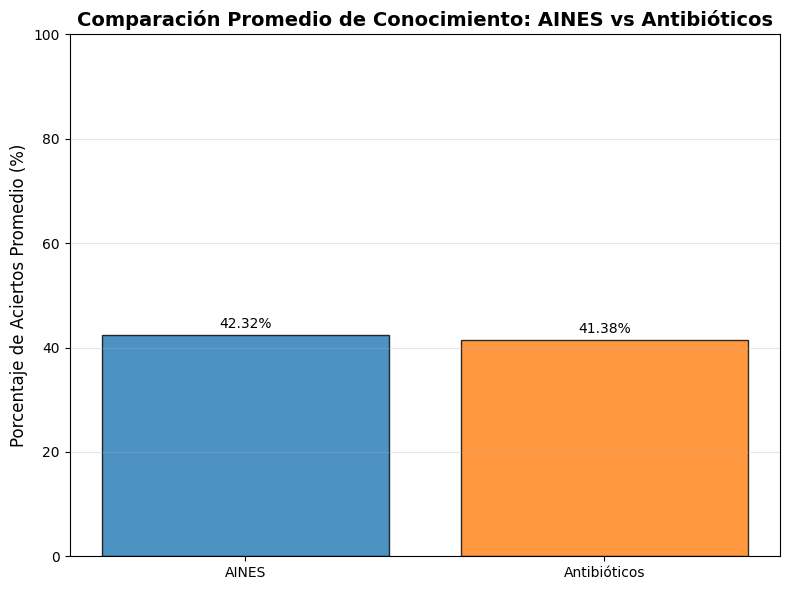

In [10]:
# Figura 5: Comparación AINES vs Antibióticos con barras y etiquetas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar las hojas del Excel (assuming 'archivo' is defined or use the filename directly)
archivo = 'cuestionario_odontopediatria.xlsx'
df_respuestas = pd.read_excel(archivo, sheet_name='Respuestas')
df_correctas = pd.read_excel(archivo, sheet_name='Respuestas_Correctas')

# Calculate aciertos por tema (copied from the first cell)
columnas_preguntas = [col for col in df_respuestas.columns if col.startswith('P')]
respuestas_dict = dict(zip(df_correctas['Pregunta'], df_correctas['Respuesta_Correcta']))

preguntas_aines = [f'P{i}' for i in range(1, 12)]  # P1-P11
preguntas_antibioticos = [f'P{i}' for i in range(12, 22)]  # P12-P21

df_respuestas['Aciertos_AINES'] = 0
df_respuestas['Aciertos_Antibioticos'] = 0

for idx, row in df_respuestas.iterrows():
    # AINES
    aciertos_aines = sum([1 for p in preguntas_aines
                          if row[p] == respuestas_dict[p]])
    df_respuestas.at[idx, 'Aciertos_AINES'] = aciertos_aines

    # Antibióticos
    aciertos_antibioticos = sum([1 for p in preguntas_antibioticos
                                 if row[p] == respuestas_dict[p]])
    df_respuestas.at[idx, 'Aciertos_Antibioticos'] = aciertos_antibioticos

# Calculate percentages
df_respuestas['Porcentaje_AINES'] = (df_respuestas['Aciertos_AINES'] / 11) * 100
df_respuestas['Porcentaje_Antibioticos'] = (df_respuestas['Aciertos_Antibioticos'] / 10) * 100


plt.figure(figsize=(8, 6))

temas = ['AINES', 'Antibióticos']
promedios_temas = [df_respuestas['Porcentaje_AINES'].mean(),
                   df_respuestas['Porcentaje_Antibioticos'].mean()]
colores_temas = ['#1f77b4', '#ff7f0e']

bar_container_temas = plt.bar(temas, promedios_temas, color=colores_temas, edgecolor='black', alpha=0.8)

# Añadir etiquetas de valores
plt.bar_label(bar_container_temas, fmt='%.2f%%', padding=3)

plt.ylabel('Porcentaje de Aciertos Promedio (%)', fontsize=12)
plt.title('Comparación Promedio de Conocimiento: AINES vs Antibióticos', fontsize=14, fontweight='bold')
plt.ylim(0, 100) # Asegurar que el eje Y va de 0 a 100
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('comparacion_temas_barras_con_etiquetas.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: comparacion_temas_barras_con_etiquetas.png")
plt.show()

✓ Guardado: distribucion_niveles_con_etiquetas.png


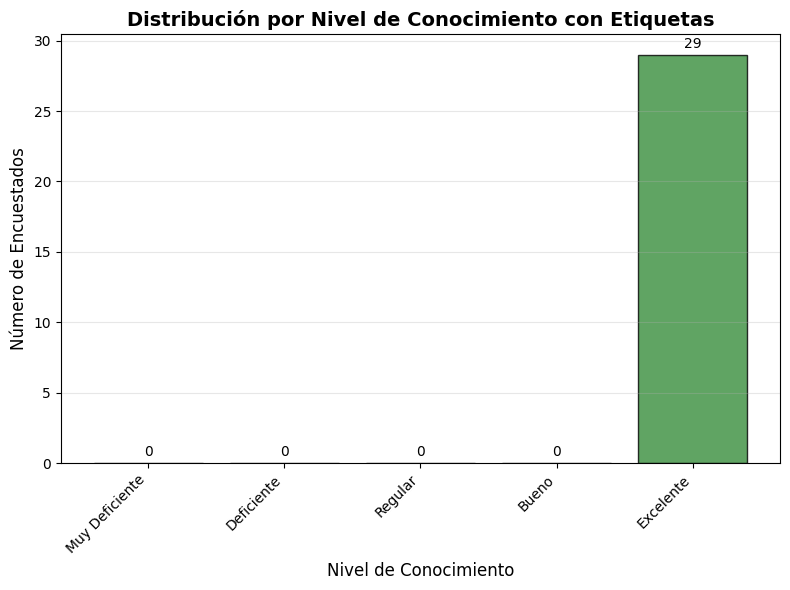

In [11]:
# Figura 6: Distribución por Nivel de Conocimiento con etiquetas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar las hojas del Excel (assuming 'archivo' is defined or use the filename directly)
archivo = 'cuestionario_odontopediatria.xlsx'
df_calificacion = pd.read_excel(archivo, sheet_name='Calificacion')


plt.figure(figsize=(8, 6))

niveles_orden = ['Muy Deficiente', 'Deficiente', 'Regular', 'Bueno', 'Excelente']
dist_niveles = df_calificacion['Nivel_Conocimiento'].value_counts()
colores = ['#d32f2f', '#ff9800', '#fdd835', '#7cb342', '#388e3c']
dist_niveles_ordenado = [dist_niveles.get(nivel, 0) for nivel in niveles_orden]

bar_container_niveles = plt.bar(niveles_orden, dist_niveles_ordenado, color=colores, edgecolor='black', alpha=0.8)

# Añadir etiquetas de valores
plt.bar_label(bar_container_niveles, padding=3)

plt.xlabel('Nivel de Conocimiento', fontsize=12)
plt.ylabel('Número de Encuestados', fontsize=12)
plt.title('Distribución por Nivel de Conocimiento con Etiquetas', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('distribucion_niveles_con_etiquetas.png', dpi=300, bbox_inches='tight')
print("✓ Guardado: distribucion_niveles_con_etiquetas.png")
plt.show()